<a href="https://colab.research.google.com/github/prajay1997/Electoral_Data_analysis/blob/main/Bihar_election_result_Electoral_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bihar_Election_Results .csv')
df.head()

,Election Year,Position,Name,Votes,Votes %,Party,AC name,AC No
0,2010,1,Rajesh Singh,42289,29.40%,Janata Dal (United),Valmiki Nagar,1
1,2010,2,Mukesh Kumar Kushwaha,27618,19.20%,Rashtriya Janata Dal,Valmiki Nagar,1
2,2010,3,Dheerendra Pratap Singh,20886,14.50%,Bahujan Samaj Party,Valmiki Nagar,1
3,2010,4,Irshad Hussain,17747,12.40%,Indian National Congress,Valmiki Nagar,1
4,2010,5,Deep Narayan Mahato,14047,9.80%,Independent,Valmiki Nagar,1


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(12301, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12301 entries, 0 to 12300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Election Year  12301 non-null  object
 1   Position       12301 non-null  int64 
 2   Name           12301 non-null  object
 3   Votes          12301 non-null  int64 
 4   Votes %        12301 non-null  object
 5   Party          12301 non-null  object
 6   AC name        12301 non-null  object
 7   AC No          12301 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 768.9+ KB


In [ ]:
df.columns

Index(['Election Year', 'Position', 'Name', 'Votes', 'Votes %', 'Party',
       'AC name', 'AC No', 'Votes %%'],
      dtype='object')

In [ ]:
df['Party'].nunique(dropna = True)

222

In [ ]:
df['AC No'].nunique(dropna = True)

243

In [ ]:
df['AC name'].nunique(dropna = True)

289

Q a) Determine the winning party for every election at the state level. A party which
has the highest total votes is considered the winner here.


In [ ]:
df['Election Year'].value_counts()

2010        3523
2015        3450
2005-Feb    3193
2005-Oct    2135
Name: Election Year, dtype: int64

In [ ]:
(np.unique(df.Party))

array(['Aadarsh Mithila Party', 'Aam Janata Party', 'Aap Aur Hum Party',
       'Aarakshan Virodhi Party', 'Adarsh Political Party',
       'Akhand Bharat Samaj Party', "Akhand Jharkhand People's Front",
       'Akhil Bharat Hindu Mahasabha', 'Akhil Bharatiya Ashok Sena',
       'Akhil Bharatiya Desh Bhakt Morcha',
       'Akhil Bharatiya Hind Kranti Party', 'Akhil Bharatiya Jan Sangh',
       'Akhil Bharatiya Rajarya Sabha', 'Akhil Bharitya Mithila Party',
       'Akhil Bhartiya Atyant Pichara Sangharsh Morcha Party',
       'Akhil Bhartiya Mithila Party', 'Akhil Hind Forward Block',
       'Akhil Jan Vikas Dal',
       'All India Babu Jagjivan Ram Saheb National Congress',
       'All India Forward Bloc', 'All India Forward Bloc (Subhasist)',
       'All India Majlis-E-Ittehadul Muslimoon', 'Alpjan Samaj Party',
       'Ambedkar National Congress', 'Amra Bangalee', 'Apna Dal',
       'Atulya Bharat Party', 'Awami Party', 'Bahujan Ekta Party (R)',
       'Bahujan Kranti Party (Marxwad

In [ ]:
df[df['Election Year'] == '2005-Feb'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(1)

Party
Rashtriya Janata Dal    6140223
Name: Votes, dtype: int64

As we can see in the year Feb-2005 Rashtriya Janata Dal has the highest no of votes, hence the Rashtriya Janata Dal Partyis the winner of year Oct-2005.

In [ ]:
df[df['Election Year'] == '2005-Oct'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(1)
# 2005-Oct Election was won by Rashtriya Janata Dal.

Party
Rashtriya Janata Dal    5525081
Name: Votes, dtype: int64

As we can see in the year Oct-2005 Rashtriya Janata Dal  has the highest no of votes, hence the Rashtriya Janata Dal Party is the winner of year oct-2005

Rashtriy janata Dal party is the winner party for the year 2005.

In [ ]:
df[df['Election Year'] == '2010'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(1)

Party
Janata Dal (United)    6561906
Name: Votes, dtype: int64

As we can see in the year 2010 Janata Dal (United) party has the highest no of votes, hence the Janata Dal (United) party is the winner of year 2010.

In [ ]:
df[df['Election Year'] == '2015'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(1)

Party
Bharatiya Janta Party    9308015
Name: Votes, dtype: int64

As we can see in the year 2015 Bharatiya Janta Party party has the highest no of votes, hence the Bharatiya Janta Partyis the winner of year 2015.

Q b)  Determine the list of swing seats for the state. A swing seat is a constituency
which has a different winner in every election. The elections are held in the order
2005-Feb, 2005-Oct, 2010 and 2015

In [ ]:
df1 = df[df['Election Year'] == '2005-Feb']
df2 = df[df['Election Year'] == '2005-Oct']
df3= df[df['Election Year'] == '2010']
df4 = df[df['Election Year'] == '2015']

In [ ]:
A1 = pd.DataFrame(df1[df1['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
A1.reset_index(inplace = True)
A1.head()

,AC No,Party,Votes
0,1,Rashtriya Janata Dal,19389
1,2,Janata Dal (United),59151
2,3,Bharatiya Janta Party,20961
3,4,Nationalist Congress Party,30421
4,5,Samajwadi Party,26161


In [ ]:
A2 = pd.DataFrame(df2[df2['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
A2.reset_index(inplace = True)
A2.head()

,AC No,Party,Votes
0,1,Rashtriya Janata Dal,19164
1,2,Janata Dal (United),60794
2,3,Bharatiya Janta Party,39147
3,4,Bharatiya Janta Party,35147
4,5,Indian National Congress,35811


In [ ]:
A3 = pd.DataFrame(df3[df3['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
A3.reset_index(inplace = True)
A3.head()

,AC No,Party,Votes
0,1,Janata Dal (United),42289
1,2,Bharatiya Janta Party,51993
2,3,Bharatiya Janta Party,45022
3,4,Janata Dal (United),67510
4,5,Independent,38381


In [ ]:
A4 = pd.DataFrame(df4[df4['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
A4.reset_index(inplace = True)
A4.head()

,AC No,Party,Votes
0,1,Independent,66860
1,2,Bharatiya Janta Party,82166
2,3,Indian National Congress,57212
3,4,Bharatiya Janta Party,74476
4,5,Bharatiya Janta Party,57351


In [ ]:
A5 = pd.DataFrame()
A5['AC No'] = A1['AC No']
A5['2005-Feb'] = A1['Party']
A5['2005-Oct'] = A2['Party']
A5['2010'] = A3['Party']
A5['2015'] = A4['Party']
A5.head()

,AC No,2005-Feb,2005-Oct,2010,2015
0,1,Rashtriya Janata Dal,Rashtriya Janata Dal,Janata Dal (United),Independent
1,2,Janata Dal (United),Janata Dal (United),Bharatiya Janta Party,Bharatiya Janta Party
2,3,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party,Indian National Congress
3,4,Nationalist Congress Party,Bharatiya Janta Party,Janata Dal (United),Bharatiya Janta Party
4,5,Samajwadi Party,Indian National Congress,Independent,Bharatiya Janta Party


In [ ]:
A_5 = A5[(A5['2005-Feb'] != A5['2005-Oct']) & (A5['2005-Oct'] != A5['2010']) & (A5['2010'] != A5['2015'])]
A_5

,AC No,2005-Feb,2005-Oct,2010,2015
3,4,Nationalist Congress Party,Bharatiya Janta Party,Janata Dal (United),Bharatiya Janta Party
4,5,Samajwadi Party,Indian National Congress,Independent,Bharatiya Janta Party
17,17,Bharatiya Janta Party,Rashtriya Janata Dal,Janata Dal (United),Bharatiya Janta Party
18,17,Independent,Lok Jan Shakti Party,Bharatiya Janta Party,Rashtriya Janata Dal
20,19,Lok Jan Shakti Party,Bahujan Samaj Party,Independent,Bharatiya Janta Party
...,...,...,...,...,...
229,230,Lok Jan Shakti Party,Janata Dal (United),Rashtriya Janata Dal,Bharatiya Janta Party
234,235,Rashtriya Janata Dal,Bharatiya Janta Party,Janata Dal (United),Rashtriya Janata Dal
239,240,Rashtriya Janata Dal,Bharatiya Janta Party,Janata Dal (United),Indian National Congress
241,242,Lok Jan Shakti Party,Independent,NaN,Bharatiya Janta Party


In [ ]:
print(A_5['AC No'].tolist())

[4, 5, 17, 17, 19, 20, 21, 24, 25, 29, 30, 31, 32, 34, 36, 38, 46, 48, 49, 50, 51, 53, 54, 55, 58, 59, 61, 63, 65, 67, 68, 69, 71, 73, 76, 77, 79, 80, 81, 83, 84, 85, 88, 90, 92, 93, 94, 95, 97, 98, 100, 103, 106, 107, 108, 109, 113, 114, 117, 121, 123, 124, 133, 134, 137, 142, 156, 159, 165, 171, 172, 194, 196, 199, 201, 203, 209, 212, 218, 228, 230, 235, 240, 242, 243]


The Above is the list of constituencies which categories as swing seats.

Qc) Determine the top 8 parties at the state-level in each election in terms of getting
the most votes.


In [ ]:
# Top 8 parties in terms of getting the most votes in Feb-2005 : 
df[df['Election Year'] == '2005-Feb'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8)

Party
Rashtriya Janata Dal        6140223
Independent                 3957945
Janata Dal (United)         3564930
Lok Jan Shakti Party        3091173
Bharatiya Janta Party       2686290
Indian National Congress    1223835
Bahujan Samaj Party         1080745
Samajwadi Party              658791
Name: Votes, dtype: int64

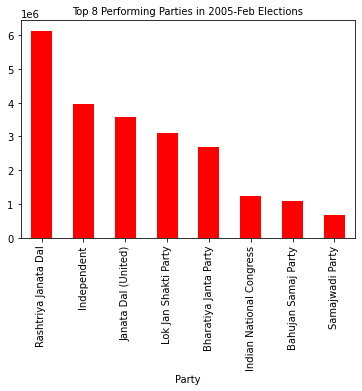

In [ ]:
df[df['Election Year'] == '2005-Feb'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'r')
plt.title('Top 8 Performing Parties in 2005-Feb Elections', fontsize = 10)
plt.show()

In [ ]:
# Top 8 parties in terms of getting the most votes in Oct-2005 : 
df[df['Election Year'] == '2005-Oct'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8)

Party
Rashtriya Janata Dal        5525081
Janata Dal (United)         4819759
Bharatiya Janta Party       3686720
Lok Jan Shakti Party        2615901
Independent                 2065744
Indian National Congress    1435449
Bahujan Samaj Party          981464
Samajwadi Party              594266
Name: Votes, dtype: int64

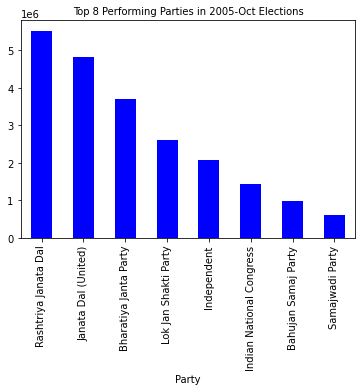

In [ ]:
df[df['Election Year'] == '2005-Oct'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'b')
plt.title('Top 8 Performing Parties in 2005-Oct Elections', fontsize = 10)
plt.show()

In [ ]:
# Top 8 parties in terms of getting the most votes in 2010 : 
df[df['Election Year'] == '2010'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8)

Party
Janata Dal (United)           6561906
Rashtriya Janata Dal          5475656
Bharatiya Janta Party         4790436
Independent                   3842812
Indian National Congress      2431477
Lok Jan Shakti Party          1957232
Bahujan Samaj Party            933947
Nationalist Congress Party     528575
Name: Votes, dtype: int64

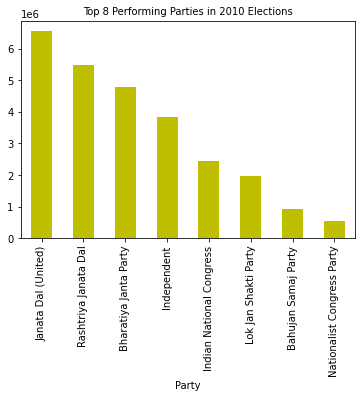

In [ ]:
# Top 8 parties in terms of getting the most votes in 2010 :
df[df['Election Year'] == '2010'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'y')
plt.title('Top 8 Performing Parties in 2010 Elections', fontsize = 10)
plt.show()

In [ ]:
# Top 8 parties in terms of getting the most votes in 2015 : 
df[df['Election Year'] == '2015'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8)

Party
Bharatiya Janta Party               9308015
Rashtriya Janata Dal                6995509
Janata Dal (United)                 6416414
Independent                         3580953
Indian National Congress            2539638
Lok Jan Shakti Party                1840834
Rashtriya Lok Samta Party            976787
Hindustani Awam Morcha (Secular)     864856
Name: Votes, dtype: int64

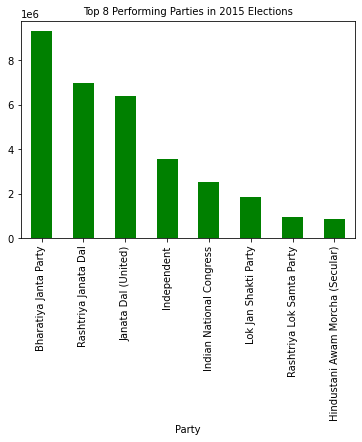

In [ ]:
df[df['Election Year'] == '2015'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8).plot(kind = 'bar', color = 'g')
plt.title('Top 8 Performing Parties in 2015 Elections', fontsize = 10)
plt.show()

Q d) Determine the minimum votes that each party in the top 8 of the 2015 election
secured among all the past elections. Do this for all constituencies.


In [ ]:
df[df['Party'] == 'Bharatiya Janta Party'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2005-Feb    2686290
2005-Oct    3686720
2010        4790436
2015        9308015
Name: Votes, dtype: int64

Bharatiya Janta Party secured minimum votes in the 2005-Feb Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Rashtriya Janata Dal'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2010        5475656
2005-Oct    5525081
2005-Feb    6140223
2015        6995509
Name: Votes, dtype: int64

Rashtriya Janata Dal secured minimum votes in the 2010 Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Janata Dal (United)'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2005-Feb    3564930
2005-Oct    4819759
2015        6416414
2010        6561906
Name: Votes, dtype: int64

Janata Dal (United) secured minimum votes in the 2005-Feb Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Independent'].groupby('Election Year')['Votes'].sum().sort_values()


Election Year
2005-Oct    2065744
2015        3580953
2010        3842812
2005-Feb    3957945
Name: Votes, dtype: int64

Independent Candidates together secured minimum votes in the 2005-Oct Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Indian National Congress'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2005-Feb    1223835
2005-Oct    1435449
2010        2431477
2015        2539638
Name: Votes, dtype: int64

Indian National Congress secured minimum votes in the 2005-Feb Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Lok Jan Shakti Party'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2015        1840834
2010        1957232
2005-Oct    2615901
2005-Feb    3091173
Name: Votes, dtype: int64

Lok Jan Shakti Party secured minimum votes in the 2015 Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Rashtriya Lok Samta Party'].groupby('Election Year')['Votes'].sum().sort_values()

Election Year
2015    976787
Name: Votes, dtype: int64

Rashtriya Lok Samta Party secured minimum votes in the 2015 Elections as compared to other elections.

In [ ]:
df[df['Party'] == 'Hindustani Awam Morcha (Secular)'].groupby('Election Year')['Votes'].sum().sort_values()


Election Year
2015    864856
Name: Votes, dtype: int64

Hindustani Awam Morcha (Secular) secured minimum votes in the 2015 Elections as compared to other elections.

Q e) Determine the consistently tri-polar constituencies. I.e Constituencies in which 3
parties or more got greater than 10% of the vote shares in each election. The
parties can be different for different elections.

In [ ]:
# Converting column 'Votes %' into numerical column by removing the % symbol from the values.

df['Votes %%'] = df['Votes %'].apply(lambda x : x.replace('%', ''))
df['Votes %%'] = pd.to_numeric(df['Votes %%'])
df

,Election Year,Position,Name,Votes,Votes %,Party,AC name,AC No,Votes %%
0,2010,1,Rajesh Singh,42289,29.40%,Janata Dal (United),Valmiki Nagar,1,29.4
1,2010,2,Mukesh Kumar Kushwaha,27618,19.20%,Rashtriya Janata Dal,Valmiki Nagar,1,19.2
2,2010,3,Dheerendra Pratap Singh,20886,14.50%,Bahujan Samaj Party,Valmiki Nagar,1,14.5
3,2010,4,Irshad Hussain,17747,12.40%,Indian National Congress,Valmiki Nagar,1,12.4
4,2010,5,Deep Narayan Mahato,14047,9.80%,Independent,Valmiki Nagar,1,9.8
...,...,...,...,...,...,...,...,...,...
12296,2005-Feb,15,Chandeshwar Prasad Gupt,534,0.60%,Independent,Chakai,243,0.6
12297,2005-Feb,16,Tirpit Singh,498,0.60%,Independent,Chakai,243,0.6
12298,2005-Feb,17,Surendra Rajbansi,437,0.50%,Independent,Chakai,243,0.5
12299,2005-Feb,18,Nawin Kumar Paswan,415,0.50%,Independent,Chakai,243,0.5


In [ ]:
df['Votes %%'].dtype

dtype('float64')

In [ ]:
df1 = df[df['Election Year'] == '2005-Feb']
df2 = df[df['Election Year'] == '2005-Oct']
df3= df[df['Election Year'] == '2010']
df4 = df[df['Election Year'] == '2015']

In [ ]:
A11 = pd.DataFrame(df1[df1['Votes %%'] > 10].groupby(['AC No','Party'])['Votes %%'].max())
A11.reset_index(inplace = True)
A22 = pd.DataFrame(df2[df2['Votes %%'] > 10].groupby(['AC No','Party'])['Votes %%'].max())
A22.reset_index(inplace = True)
A33 = pd.DataFrame(df3[df3['Votes %%'] > 10].groupby(['AC No','Party'])['Votes %%'].max())
A33.reset_index(inplace = True)
A44 = pd.DataFrame(df4[df4['Votes %%'] > 10].groupby(['AC No','Party'])['Votes %%'].max())
A44.reset_index(inplace = True)

In [ ]:
A111 = pd.DataFrame(A11['AC No'].value_counts())
A111.reset_index(inplace = True)
A1111 = pd.DataFrame()
A1111['AC No'] = A111['index']
A1111['Count'] = A111['AC No']

A222 = pd.DataFrame(A22['AC No'].value_counts())
A222.reset_index(inplace = True)
A2222 = pd.DataFrame()
A2222['AC No'] = A222['index']
A2222['Count'] = A222['AC No']

A333 = pd.DataFrame(A33['AC No'].value_counts())
A333.reset_index(inplace = True)
A3333 = pd.DataFrame()
A3333['AC No'] = A333['index']
A3333['Count'] = A333['AC No']

A444 = pd.DataFrame(A44['AC No'].value_counts())
A444.reset_index(inplace = True)
A4444 = pd.DataFrame()
A4444['AC No'] = A444['index']
A4444['Count'] = A444['AC No']

In [ ]:
print(A1111[A1111['Count'] >= 3].sort_values(by = 'AC No')['AC No'].tolist())
# Following is the list of tri-polar constituencies for the 2005-Feb Elections.

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 29, 30, 31, 35, 36, 38, 39, 40, 45, 46, 48, 49, 50, 53, 54, 55, 57, 58, 59, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 88, 89, 90, 91, 92, 93, 95, 96, 97, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 128, 130, 132, 134, 135, 136, 137, 138, 141, 142, 143, 145, 146, 147, 148, 149, 150, 152, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 168, 169, 172, 173, 175, 177, 178, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 217, 218, 219, 221, 222, 223, 224, 227, 228, 230, 231, 233, 234, 235, 237, 243]


In [ ]:

print(A2222[A2222['Count'] >= 3].sort_values(by = 'AC No')['AC No'].tolist())
# Following is the list of tri-polar constituencies for the 2005-Oct Elections.

[1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 24, 25, 30, 31, 34, 38, 39, 42, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 113, 116, 117, 118, 120, 122, 124, 125, 127, 128, 130, 131, 132, 134, 135, 136, 137, 138, 139, 141, 144, 145, 146, 147, 148, 154, 155, 157, 159, 161, 164, 165, 166, 168, 169, 170, 171, 173, 177, 181, 182, 184, 185, 186, 187, 192, 194, 195, 196, 197, 199, 200, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 230, 231, 233, 234, 235, 236, 237, 238, 239, 241]


In [ ]:
print(A3333[A3333['Count'] >= 3].sort_values(by = 'AC No')['AC No'].tolist())
# Following is the list of tri-polar constituencies for the 2010 Elections.

[1, 2, 3, 4, 5, 6, 8, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 29, 30, 31, 32, 33, 37, 40, 41, 43, 49, 50, 51, 53, 54, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 76, 77, 78, 79, 81, 82, 85, 87, 89, 90, 95, 96, 98, 102, 103, 106, 107, 108, 116, 117, 119, 120, 124, 129, 134, 138, 139, 141, 142, 143, 144, 146, 147, 149, 150, 155, 156, 158, 160, 161, 162, 164, 166, 168, 169, 170, 189, 190, 192, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 209, 212, 213, 214, 216, 217, 220, 221, 223, 226, 234, 236, 237, 238, 243]


In [ ]:
print(A4444[A4444['Count'] >= 3].sort_values(by = 'AC No')['AC No'].tolist())
# Following is the list of tri-polar constituencies for the 2015 Elections.

[1, 3, 5, 8, 10, 16, 17, 21, 22, 29, 31, 34, 48, 52, 55, 57, 60, 63, 64, 65, 66, 77, 95, 99, 103, 104, 105, 106, 107, 108, 113, 114, 120, 134, 137, 140, 142, 143, 147, 151, 155, 160, 161, 162, 169, 178, 189, 190, 191, 192, 195, 196, 197, 203, 206, 209, 212, 213, 214, 218, 219, 220, 221, 226, 238, 242, 243]


Q f) Determine the stronghold party-seats. A stronghold seat is one that is won by the
same party in all the elections.

In [ ]:
B1 = pd.DataFrame(df1[df1['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
B1.reset_index(inplace = True)
B1.head()

,AC No,Party,Votes
0,1,Rashtriya Janata Dal,19389
1,2,Janata Dal (United),59151
2,3,Bharatiya Janta Party,20961
3,4,Nationalist Congress Party,30421
4,5,Samajwadi Party,26161


In [ ]:
B2 = pd.DataFrame(df2[df2['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
B2.reset_index(inplace = True)
B2.head()

,AC No,Party,Votes
0,1,Rashtriya Janata Dal,19164
1,2,Janata Dal (United),60794
2,3,Bharatiya Janta Party,39147
3,4,Bharatiya Janta Party,35147
4,5,Indian National Congress,35811


In [ ]:
B3 = pd.DataFrame(df3[df3['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
B3.reset_index(inplace = True)
B3.head()

,AC No,Party,Votes
0,1,Janata Dal (United),42289
1,2,Bharatiya Janta Party,51993
2,3,Bharatiya Janta Party,45022
3,4,Janata Dal (United),67510
4,5,Independent,38381


In [ ]:
B4 = pd.DataFrame(df4[df4['Position'] == 1].groupby(['AC No','Party'])['Votes'].max())
B4.reset_index(inplace = True)
B4.head()

,AC No,Party,Votes
0,1,Independent,66860
1,2,Bharatiya Janta Party,82166
2,3,Indian National Congress,57212
3,4,Bharatiya Janta Party,74476
4,5,Bharatiya Janta Party,57351


In [ ]:
B5 = pd.DataFrame()
B5['AC No'] = B1['AC No']
B5['2005-Feb'] = B1['Party']
B5['2005-Oct'] = B2['Party']
B5['2010'] = B3['Party']
B5['2015'] = B4['Party']
B5[(B5['2005-Feb'] == B5['2005-Oct']) & (B5['2005-Oct'] == B5['2010']) & (B5['2010'] == B5['2015'])]

,AC No,2005-Feb,2005-Oct,2010,2015
6,7,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party
7,8,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party
9,10,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party,Bharatiya Janta Party
42,41,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
72,72,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
112,112,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
162,163,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
175,176,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
201,202,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)
214,215,Janata Dal (United),Janata Dal (United),Janata Dal (United),Janata Dal (United)



1. The above table shows us the strong hold seats for Bharatiya Janta Party and Janata Dal (United).
2. AC No. 7, 8, 10 have been the strong hold seats of Bharatiya Janta Party.
3. AC No. 41, 72, 112, 163, 176, 202, 215 have been the strong hold seats of Janata Dal (United).

Q g)   Determine close contest constituencies. Close contest seats are those in which the top 2 finishers had a difference of less than 10% votes. Find seats in which there was a close contest in all the elections. If there is no such seat, then relax the criteria to 15%.

In [ ]:
B1 = df1[df1['Position'] == 1][['AC No', 'Votes %%']]
B1.reset_index(inplace = True)
B11 = df1[df1['Position'] == 2][['AC No', 'Votes %%']]
B11.reset_index(inplace = True)
B111 = pd.DataFrame()
B111['AC No'] = B1['AC No']
B111['Votes % 1'] = B1['Votes %%'] 
B111['Votes % 2'] = B11['Votes %%']
B111['Difference'] = B1['Votes %%'] - B11['Votes %%']

B_1 = df2[df2['Position'] == 1][['AC No', 'Votes %%']]
B_1.reset_index(inplace = True)
B_11 = df2[df2['Position'] == 2][['AC No', 'Votes %%']]
B_11.reset_index(inplace = True)
B_111 = pd.DataFrame()
B_111['AC No'] = B_1['AC No']
B_111['Votes % 1'] = B_1['Votes %%'] 
B_111['Votes % 2'] = B_11['Votes %%']
B_111['Difference'] = B_1['Votes %%'] - B_11['Votes %%']

B__1 = df3[df3['Position'] == 1][['AC No', 'Votes %%']]
B__1.reset_index(inplace = True)
B__11 = df3[df3['Position'] == 2][['AC No', 'Votes %%']]
B__11.reset_index(inplace = True)
B__111 = pd.DataFrame()
B__111['AC No'] = B__1['AC No']
B__111['Votes % 1'] = B__1['Votes %%'] 
B__111['Votes % 2'] = B__11['Votes %%']
B__111['Difference'] = B__1['Votes %%'] - B__11['Votes %%']

B___1 = df4[df4['Position'] == 1][['AC No', 'Votes %%']]
B___1.reset_index(inplace = True)
B___11 = df4[df4['Position'] == 2][['AC No', 'Votes %%']]
B___11.reset_index(inplace = True)
B___111 = pd.DataFrame()
B___111['AC No'] = B___1['AC No']
B___111['Votes % 1'] = B___1['Votes %%'] 
B___111['Votes % 2'] = B___11['Votes %%']
B___111['Difference'] = B___1['Votes %%'] - B__11['Votes %%']

In [ ]:
print(B111[B111['Difference'] < 10]['AC No'].tolist())
# Following is the list of close contest constituencies for the 2005-Feb Elections.

[1, 3, 5, 6, 8, 9, 10, 11, 15, 16, 19, 20, 23, 24, 25, 28, 31, 32, 35, 36, 37, 38, 40, 41, 17, 43, 49, 50, 52, 53, 55, 56, 57, 58, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 82, 83, 84, 86, 87, 90, 91, 92, 93, 94, 96, 99, 102, 103, 105, 106, 107, 108, 110, 112, 113, 114, 115, 116, 117, 124, 125, 127, 128, 129, 130, 16, 134, 135, 137, 138, 139, 141, 142, 146, 147, 149, 153, 154, 155, 156, 158, 159, 160, 161, 163, 164, 165, 169, 172, 175, 178, 180, 183, 184, 185, 191, 192, 194, 195, 196, 197, 199, 200, 202, 203, 204, 207, 208, 209, 211, 212, 213, 214, 216, 218, 219, 222, 223, 225, 226, 230, 233, 237, 239, 240, 242]


In [ ]:
print(B_111[B_111['Difference'] < 10]['AC No'].tolist())
# Following is the list of close contest constituencies for the 2005-Oct Elections.

[1, 3, 4, 5, 6, 9, 10, 11, 14, 15, 18, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 35, 36, 37, 38, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 65, 66, 68, 71, 72, 73, 74, 75, 76, 77, 79, 81, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 96, 97, 98, 100, 102, 106, 107, 108, 113, 115, 116, 117, 118, 119, 120, 124, 125, 127, 128, 129, 130, 132, 134, 135, 137, 138, 141, 142, 144, 145, 146, 147, 149, 152, 154, 156, 157, 158, 159, 161, 163, 164, 166, 169, 170, 172, 178, 183, 185, 192, 193, 195, 197, 199, 200, 201, 202, 203, 204, 205, 208, 209, 212, 213, 214, 218, 219, 221, 222, 223, 224, 227, 229, 230, 231, 233, 234, 235, 236, 237, 238, 239, 240, 242]


In [ ]:
print(B__111[B__111['Difference'] < 10]['AC No'].tolist())
# Following is the list of close contest constituencies for the 2010 Elections.

[5, 9, 10, 12, 14, 17, 18, 21, 22, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 39, 46, 51, 52, 53, 54, 55, 57, 58, 65, 66, 67, 73, 75, 77, 78, 81, 82, 84, 85, 86, 90, 93, 95, 98, 100, 106, 107, 114, 115, 116, 117, 119, 121, 125, 127, 128, 129, 133, 134, 135, 139, 140, 141, 142, 143, 151, 152, 154, 155, 156, 157, 158, 160, 161, 163, 167, 169, 170, 178, 185, 187, 189, 190, 191, 192, 193, 195, 197, 198, 203, 204, 205, 206, 207, 208, 209, 212, 213, 214, 216, 218, 219, 220, 223, 225, 226, 227, 229, 232, 236, 237, 239, 242, 243]


In [ ]:
print(B___111[B___111['Difference'] < 10]['AC No'].tolist())
# Following is the list of close contest constituencies for the 2015 Elections.

[10, 22, 26, 27, 163, 31, 34, 36, 38, 52, 54, 58, 60, 65, 66, 67, 77, 86, 88, 35, 95, 98, 99, 105, 107, 113, 114, 115, 137, 151, 172, 155, 158, 169, 71, 178, 180, 199, 196, 197, 8, 209, 212, 213, 215, 219, 220, 221, 225, 146, 233, 238, 242]


Q h) Find the growing seats. For the top 8 parties at the state-level in the 2005-Feb
Election, Determine the seats in which these parties have continuously increased
their votes in the next 3 elections.

In [ ]:
df[df['Election Year'] == '2005-Feb'].groupby('Party')['Votes'].sum().sort_values(ascending = False).head(8)
# Below is the list of the top 8 parties in the 2005-Feb Elections. 

Party
Rashtriya Janata Dal        6140223
Independent                 3957945
Janata Dal (United)         3564930
Lok Jan Shakti Party        3091173
Bharatiya Janta Party       2686290
Indian National Congress    1223835
Bahujan Samaj Party         1080745
Samajwadi Party              658791
Name: Votes, dtype: int64

In [ ]:
df1.head()

,Election Year,Position,Name,Votes,Votes %,Party,AC name,AC No,Votes %%
9108,2005-Feb,1,Rajesh Singh,19389,30.60%,Rashtriya Janata Dal,Valmiki Nagar,1,30.6
9109,2005-Feb,2,Ramadhar Yadav,13287,21.00%,Samajwadi Party,Valmiki Nagar,1,21.0
9110,2005-Feb,3,Mukesh Kumar Kushwaha,10865,17.20%,Independent,Valmiki Nagar,1,17.2
9111,2005-Feb,4,Arun Kumar Tiwari,5073,8.00%,Lok Jan Shakti Party,Valmiki Nagar,1,8.0
9112,2005-Feb,5,Bawwan Prasad Yadav,3320,5.30%,Samata Party,Valmiki Nagar,1,5.3


In [ ]:
C1 = df1[df1['Party'] == 'Rashtriya Janata Dal'][['AC No','Votes %%']]
C1.reset_index(inplace = True)
C1.head()

,index,AC No,Votes %%
0,9108,1,30.6
1,9120,2,22.8
2,9133,3,16.8
3,9156,4,6.9
4,9173,5,4.6


In [ ]:
C2 = df2[df2['Party'] == 'Rashtriya Janata Dal'][['AC No','Votes %%']]
C2.reset_index(inplace = True)
C2.head()

,index,AC No,Votes %%
0,6973,1,32.3
1,6996,3,36.6
2,7033,6,12.5
3,7052,9,31.9
4,7068,11,26.4


In [ ]:
C3 = df3[df3['Party'] == 'Rashtriya Janata Dal'][['AC No','Votes %%']]
C3.reset_index(inplace = True)
C3.head()

,index,AC No,Votes %%
0,1,1,19.2
1,17,2,7.3
2,34,3,7.0
3,47,4,13.8
4,63,5,19.3


In [ ]:
C4 = df4[df4['Party'] == 'Rashtriya Janata Dal'][['AC No','Votes %%']]
C4.reset_index(inplace = True)
C4.head()

,index,AC No,Votes %%
0,3577,5,28.1
1,3641,10,37.9
2,3651,11,35.1
3,3664,12,46.0
4,3676,13,49.9


In [ ]:
C11 = pd.DataFrame()
C11['AC No'] = C1['AC No']
C11['2005-Feb'] = C1['Votes %%']
C11['2005-Oct'] = C2['Votes %%']
C11['2010'] = C3['Votes %%']
C11['2015'] = C4['Votes %%']

In [ ]:
C11.head()

,AC No,2005-Feb,2005-Oct,2010,2015
0,1,30.6,32.3,19.2,28.1
1,2,22.8,36.6,7.3,37.9
2,3,16.8,12.5,7.0,35.1
3,4,6.9,31.9,13.8,46.0
4,5,4.6,26.4,19.3,49.9


In [ ]:
C111 = C11[(C11['2005-Feb'] < C11['2005-Oct']) & (C11['2005-Oct'] < C11['2010']) & (C11['2010'] < C11['2015'])]['AC No']

In [ ]:
print(C11[(C11['2005-Feb'] < C11['2005-Oct']) & (C11['2005-Oct'] < C11['2010']) & (C11['2010'] < C11['2015'])]['AC No'].tolist())

[8, 11, 22, 24, 56, 62, 65, 66, 68, 78, 92, 107, 109]


In the case of Rashtriya Janata Dal, above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
D1 = df1[df1['Party'] == 'Independent'][['AC No','Votes %%']]
D1.reset_index(inplace = True)
D2 = df2[df2['Party'] == 'Independent'][['AC No','Votes %%']]
D2.reset_index(inplace = True)
D3 = df3[df3['Party'] == 'Independent'][['AC No','Votes %%']]
D3.reset_index(inplace = True)
D4 = df4[df4['Party'] == 'Independent'][['AC No','Votes %%']]
D4.reset_index(inplace = True)
D11 = pd.DataFrame()
D11['AC No'] = D1['AC No']
D11['2005-Feb'] = D1['Votes %%']
D11['2005-Oct'] = D2['Votes %%']
D11['2010'] = D3['Votes %%']
D11['2015'] = D4['Votes %%']

In [ ]:
print(D11[(D11['2005-Feb'] < D11['2005-Oct']) & (D11['2005-Oct'] < D11['2010']) & (D11['2010'] < D11['2015'])]['AC No'].tolist())

[3, 5, 8, 14, 14, 21, 23, 37, 39, 17, 54, 59, 59, 59, 59, 62, 67, 71, 89, 95, 120, 130, 16]


In the case of Independent Candidates,, above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
E1 = df1[df1['Party'] == 'Janata Dal (United)'][['AC No','Votes %%']]
E1.reset_index(inplace = True)
E2 = df2[df2['Party'] == 'Janata Dal (United)'][['AC No','Votes %%']]
E2.reset_index(inplace = True)
E3 = df3[df3['Party'] == 'Janata Dal (United)'][['AC No','Votes %%']]
E3.reset_index(inplace = True)
E4 = df4[df4['Party'] == 'Janata Dal (United)'][['AC No','Votes %%']]
E4.reset_index(inplace = True)
E11 = pd.DataFrame()
E11['AC No'] = E1['AC No']
E11['2005-Feb'] = E1['Votes %%']
E11['2005-Oct'] = E2['Votes %%']
E11['2010'] = E3['Votes %%']
E11['2015'] = E4['Votes %%']

In [ ]:
print(E11[(E11['2005-Feb'] < E11['2005-Oct']) & (E11['2005-Oct'] < E11['2010']) & (E11['2010'] < E11['2015'])]['AC No'].tolist())

[1, 23, 61, 83, 88, 92, 101, 115, 123, 124, 173]


 In the case of Janata Dal (United), above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
F1 = df1[df1['Party'] == 'Lok Jan Shakti Party'][['AC No','Votes %%']]
F1.reset_index(inplace = True)
F2 = df2[df2['Party'] == 'Lok Jan Shakti Party'][['AC No','Votes %%']]
F2.reset_index(inplace = True)
F3 = df3[df3['Party'] == 'Lok Jan Shakti Party'][['AC No','Votes %%']]
F3.reset_index(inplace = True)
F4 = df4[df4['Party'] == 'Lok Jan Shakti Party'][['AC No','Votes %%']]
F4.reset_index(inplace = True)
F11 = pd.DataFrame()
F11['AC No'] = F1['AC No']
F11['2005-Feb'] = F1['Votes %%']
F11['2005-Oct'] = F2['Votes %%']
F11['2010'] = F3['Votes %%']
F11['2015'] = F4['Votes %%']

In [ ]:
print(F11[(F11['2005-Feb'] < F11['2005-Oct']) & (F11['2005-Oct'] < F11['2010']) & (F11['2010'] < F11['2015'])]['AC No'].tolist())

[16, 25, 28, 39, 17]


 In the case of Lok Jan Shakti Party, above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
G1 = df1[df1['Party'] == 'Bharatiya Janta Party'][['AC No','Votes %%']]
G1.reset_index(inplace = True)
G2 = df2[df2['Party'] == 'Bharatiya Janta Party'][['AC No','Votes %%']]
G2.reset_index(inplace = True)
G3 = df3[df3['Party'] == 'Bharatiya Janta Party'][['AC No','Votes %%']]
G3.reset_index(inplace = True)
G4 = df4[df4['Party'] == 'Bharatiya Janta Party'][['AC No','Votes %%']]
G4.reset_index(inplace = True)
G11 = pd.DataFrame()
G11['AC No'] = G1['AC No']
G11['2005-Feb'] = G1['Votes %%']
G11['2005-Oct'] = G2['Votes %%']
G11['2010'] = G3['Votes %%']
G11['2015'] = G4['Votes %%']

In [ ]:
print(G11[(G11['2005-Feb'] < G11['2005-Oct']) & (G11['2005-Oct'] < G11['2010']) & (G11['2010'] < G11['2015'])]['AC No'].tolist())

[3, 5, 21, 31, 71, 79, 113, 145]


 In the case of Bharatiya Janta Party, above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
H1 = df1[df1['Party'] == 'Indian National Congress'][['AC No','Votes %%']]
H1.reset_index(inplace = True)
H2 = df2[df2['Party'] == 'Indian National Congress'][['AC No','Votes %%']]
H2.reset_index(inplace = True)
H3 = df3[df3['Party'] == 'Indian National Congress'][['AC No','Votes %%']]
H3.reset_index(inplace = True)
H4 = df4[df4['Party'] == 'Indian National Congress'][['AC No','Votes %%']]
H4.reset_index(inplace = True)
H11 = pd.DataFrame()
H11['AC No'] = H1['AC No']
H11['2005-Feb'] = H1['Votes %%']
H11['2005-Oct'] = H2['Votes %%']
H11['2010'] = H3['Votes %%']
H11['2015'] = H4['Votes %%']

In [ ]:
print(H11[(H11['2005-Feb'] < H11['2005-Oct']) & (H11['2005-Oct'] < H11['2010']) & (H11['2010'] < H11['2015'])]['AC No'].tolist())

[]


 In the case of Indian National Congress, there is no constituency that has witnessed continuous growth in thier votes 
 for the last 3 elections.

In [ ]:
I1 = df1[df1['Party'] == 'Bahujan Samaj Party'][['AC No','Votes %%']]
I1.reset_index(inplace = True)
I2 = df2[df2['Party'] == 'Bahujan Samaj Party'][['AC No','Votes %%']]
I2.reset_index(inplace = True)
I3 = df3[df3['Party'] == 'Bahujan Samaj Party'][['AC No','Votes %%']]
I3.reset_index(inplace = True)
I4 = df4[df4['Party'] == 'Bahujan Samaj Party'][['AC No','Votes %%']]
I4.reset_index(inplace = True)
I11 = pd.DataFrame()
I11['AC No'] = I1['AC No']
I11['2005-Feb'] = I1['Votes %%']
I11['2005-Oct'] = I2['Votes %%']
I11['2010'] = I3['Votes %%']
I11['2015'] = I4['Votes %%']

In [ ]:
print(I11[(I11['2005-Feb'] < I11['2005-Oct']) & (I11['2005-Oct'] < I11['2010']) & (I11['2010'] < I11['2015'])]['AC No'].tolist())

[169, 199]


 In the case of Bahujan Samaj Party, above list contains constituencies  which have witnessed continuous growth in thier votes 
for the last 3 elections.

In [ ]:
J1 = df1[df1['Party'] == 'Samajwadi Party'][['AC No','Votes %%']]
J1.reset_index(inplace = True)
J2 = df2[df2['Party'] == 'Samajwadi Party'][['AC No','Votes %%']]
J2.reset_index(inplace = True)
J3 = df3[df3['Party'] == 'Samajwadi Party'][['AC No','Votes %%']]
J3.reset_index(inplace = True)
J4 = df4[df4['Party'] == 'Samajwadi Party'][['AC No','Votes %%']]
J4.reset_index(inplace = True)
J11 = pd.DataFrame()
J11['AC No'] = J1['AC No']
J11['2005-Feb'] = J1['Votes %%']
J11['2005-Oct'] = J2['Votes %%']
J11['2010'] = J3['Votes %%']
J11['2015'] = J4['Votes %%']

In [ ]:
print(J11[(J11['2005-Feb'] < J11['2005-Oct']) & (J11['2005-Oct'] < J11['2010']) & (J11['2010'] < J11['2015'])]['AC No'].tolist())

[62]


In the case of Samajwadi Party, the above 1 constituency have witnessed continuous growth in thier votes 
 for the last 3 elections.

Q j) Determine the state-winner-match constituencies. Find the seats which have
always elected the party that has gone on to win the state election (most votes
secured at state). So if the RJD won at the state level in 2010, then seats which
voted an RJD candidate as winner are considered in this category. This criteria
for a seat has to be matched for each election.


  Considering results from question a. :
1.  2005-Feb Election was won by Rashtriya Janata Dal.
2.  2005-Oct Election was won by Rashtriya Janata Dal.
3.  2010 Election was won by Janata Dal (United).
4.  2015 Election was won by Bharatiya Janta Party.

In [ ]:
print(df1[(df1['Position'] == 1) & (df1['Party'] == 'Rashtriya Janata Dal')]['AC No'].tolist())

[1, 11, 15, 16, 22, 26, 27, 29, 32, 43, 44, 46, 50, 53, 55, 60, 61, 63, 64, 66, 70, 71, 77, 79, 82, 85, 86, 87, 88, 91, 92, 93, 96, 100, 102, 103, 114, 115, 128, 135, 137, 142, 145, 147, 151, 152, 154, 156, 157, 161, 162, 169, 170, 185, 192, 193, 199, 200, 208, 210, 211, 212, 213, 217, 218, 221, 222, 227, 229, 234, 235, 236, 237, 238, 240]


In [ ]:
df.columns

Index(['Election Year', 'Position', 'Name', 'Votes', 'Votes %', 'Party',
       'AC name', 'AC No', 'Votes %%'],
      dtype='object')

In [ ]:
print(df1[df1['AC No'] == 44][['Party','Votes']])

                         Party  Votes
9701      Rashtriya Janata Dal  47680
9702     Bharatiya Janta Party  37129
9703  Indian National Congress   2585
9704       Bahujan Samaj Party   1970
9705               Independent   1190
9706           Samajwadi Party   1093
9707               Independent    740
9708                  Apna Dal    643


Above is the list of constituencies which voted for the candidate belonging to the party - Rashtriya Janata Dal which won the 2005-Feb state elections.

In [ ]:
print(df2[(df2['Position'] == 1) & (df2['Party'] == 'Rashtriya Janata Dal')]['AC No'].tolist())

[1, 15, 18, 22, 26, 27, 28, 38, 44, 46, 49, 50, 60, 61, 65, 66, 70, 71, 83, 84, 85, 87, 88, 91, 92, 96, 97, 98, 100, 102, 124, 125, 135, 145, 147, 152, 154, 158, 161, 172, 192, 193, 196, 200, 210, 213, 221, 222, 226, 227, 229, 234, 237, 238]


Above is the list of constituencies which voted for the candidate belonging to the party - Rashtriya Janata Dal  which won the 2005-Oct state elections.



In [ ]:
print(df3[(df3['Position'] == 1) & (df3['Party'] == 'Janata Dal (United)')]['AC No'].tolist())

[1, 4, 6, 12, 14, 16, 17, 18, 22, 26, 27, 29, 30, 31, 38, 39, 40, 41, 17, 43, 44, 45, 50, 60, 61, 67, 70, 71, 72, 74, 76, 79, 85, 90, 91, 92, 93, 95, 98, 99, 102, 104, 109, 110, 112, 113, 114, 120, 121, 124, 125, 126, 127, 128, 16, 132, 135, 136, 138, 140, 141, 144, 145, 148, 149, 150, 153, 157, 158, 159, 160, 163, 164, 165, 166, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 181, 188, 189, 196, 201, 202, 204, 207, 209, 210, 213, 215, 216, 217, 218, 219, 221, 222, 224, 226, 227, 228, 231, 233, 237, 238, 239, 240, 241, 242]


Above  is the list of constituencies which voted for the candidate belonging to the party - Janata Dal (United) which won the 2010 state elections.

In [ ]:
print(df4[(df4['Position'] == 1) & (df4['Party'] == 'Bharatiya Janta Party')]['AC No'].tolist())

[2, 4, 5, 6, 7, 10, 11, 16, 17, 18, 19, 20, 96, 25, 37, 45, 48, 51, 59, 62, 63, 66, 83, 87, 93, 94, 97, 99, 101, 105, 118, 120, 123, 161, 168, 71, 179, 180, 181, 182, 183, 184, 186, 203, 204, 8, 206, 219, 225, 230, 236, 239, 242]


Above  is the list of constituencies which voted for the candidate belonging to the party - Bharatiya Janta Party  which won the 2015 state elections.